***Cantidad de Postulaciones y Cantidad de Vistas vs. Tiempo***

En este notebook se estudiará la relacion entre la cantidad de postulaciones y de vistas y el factor tiempo. En particular, se analizarán según hora del día, día de la semana y día del mes, evaluando si existe o no alguna correlación de interés que permita sacar conclusiones acerca del comportamiento de las personas según diversidades temporales.

Como siempre, se comienza por importar las herramientas que se van a utilzar:

In [1]:
#Realizo imports
import pandas as pd
import numpy as npy
import matplotlib as plt
import csv
%matplotlib inline

**Limpieza de datos**

Una vez importadas las herramientas a utilizar, se leen los archivos necesarios. Luego, se filtran aquellos datos que no son útiles a los fines de este análisis y se hacen las correcciones que sean necesarias. En este caso, se observará el tipo de dato de las columnas que registran el tiempo de vista/postulación.

In [2]:
#Leo el archivo csv de postulaciones y hago un head() para ver qué tiene
dfpostulaciones = pd.read_csv("TP1/fiuba_4_postulaciones.csv")
dfpostulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


Ya que lo que interesa en este caso es estudiar el tiempo y contar postulaciones, no se necesita la columna "idaviso". Por otra parte, se revisan los tipos de datos. Se busca que en particular, la columna "fechapostulacion" sea del tipo datetime.

In [3]:
#Ignoro la columna "idaviso" y miro los tipos de los datos
dfpostulaciones = dfpostulaciones[["idpostulante","fechapostulacion"]]
dfpostulaciones.dtypes

idpostulante        object
fechapostulacion    object
dtype: object

Se cambia el tipo de dato de la columna a datetime para poder trabajar con ella.

In [4]:
#Arreglo el tipo de dato de la columna "fechapostulacion"
dfpostulaciones["fechapostulacion"] = pd.to_datetime(dfpostulaciones["fechapostulacion"])
dfpostulaciones.dtypes

idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [5]:
#Leo el archivo csv de vistas y hago un head() para ver qué tiene
dfvistas = pd.read_csv("TP1/fiuba_3_vistas.csv")
dfvistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


Antes de continuar, cabe destacar que existen más de una vista por persona a un mismo aviso. Para este análisis, se descartarán aquellos registros duplicados que contengan el mismo idAviso e idpostulante, es decir, no se permitirá lo anterior. Se considerará una única vista por persona por aviso. La diferencia en cantidad de información se puede apreciar realizando df.shape:

In [6]:
dfvistas.shape

(961897, 3)

In [7]:
dfvistas = dfvistas.drop_duplicates(subset = ["idAviso", "idpostulante"])

In [8]:
dfvistas.shape

(592299, 3)

Existían 369.598 registros duplicados en los términos antes mencionados. Ahora se prosigue de la misma forma que con el data frame de postulaciones.

In [9]:
#Ignoro la columna "idAviso" y miro los tipos de los datos
dfvistas = dfvistas[["idpostulante","timestamp"]]
dfvistas.dtypes

idpostulante    object
timestamp       object
dtype: object

In [10]:
#Arreglo el tipo de dato de la columna "timestamp"
dfvistas["timestamp"] = pd.to_datetime(dfvistas["timestamp"])
dfvistas.dtypes

idpostulante            object
timestamp       datetime64[ns]
dtype: object

Ahora que se tienen los data frames "dfpostulaciones" y "dfavisos" con la información necesaria y los tipos de datos correctos, se prosigue con los análisis.

**Postulaciones y Hora del Día**

Text(0,0.5,'Cantidad de postulaciones')

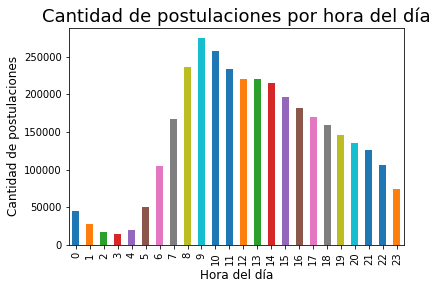

In [24]:
#Se obtiene la hora, se cuenta y se vuelca en un gráfico
grafico1 = dfpostulaciones["fechapostulacion"].dt.hour.value_counts().sort_index().plot(kind = "bar")
grafico1.set_title("Cantidad de postulaciones por hora del día", fontsize=18)
grafico1.set_xlabel("Hora del día", fontsize = 12)
grafico1.set_ylabel("Cantidad de postulaciones", fontsize = 12)

La mayor cantidad de postulaciones se registra por la mañana, donde el pico se observa alrededor de las 9 horas. A partir de ahí, el número disminuye casi constantemente cuánto más tarde se hace, hasta las 23 horas, cuando se nota una brusca caída. En los horarios de la madrugada se observa la mímina cantidad de postulaciones, en particular, a las 3 horas. 

Este patrón tiene sentido con una rutina de decisión y acción donde es frecuente que la decisión se tome un día y su acción sea lo primero que se realiza el día siguiente.

**Vistas y Hora del Día**

Text(0,0.5,'Cantidad de vistas')

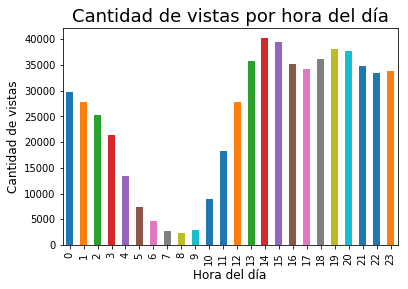

In [25]:
#Se obtiene la hora, se cuenta y se vuelca en un gráfico
grafico2 = dfvistas["timestamp"].dt.hour.value_counts().sort_index().plot(kind = "bar")
grafico2.set_title("Cantidad de vistas por hora del día", fontsize=18)
grafico2.set_xlabel("Hora del día", fontsize = 12)
grafico2.set_ylabel("Cantidad de vistas", fontsize = 12)

En este gráfico se observa que por la mañana se encuentra el mínimo de vistas mientras que por la tarde aumenta notoriamente y permanece alto hasta media madrugada.

Este patrón tiene que ver con cuándo tiene una persona promedio tiempo libre para explorar las distintas posibilidades a empleo. Por las mañanas, es posible que una persona se encuentre durmiendo, en otro trabajo o estudiando. A eso de las 14 horas, durante el almuerzo, la gente suele tener tiempo libre, el cual puede utilizar para realizar dichas vistas. Luego disminuye de nuevo, probablemente por la ocupación o estudios, y vuelve a aumentar a eso de las 19 horas cuando se suele regresar a las casas. Finalmente, es común asimismo quedarse hasta tarde viendo opciones de empleo, lo cual justifica la cantidad de vistas por la madrugada.

**Postulaciones y Día de la Semana**

Text(0,0.5,'Cantidad de postulaciones')

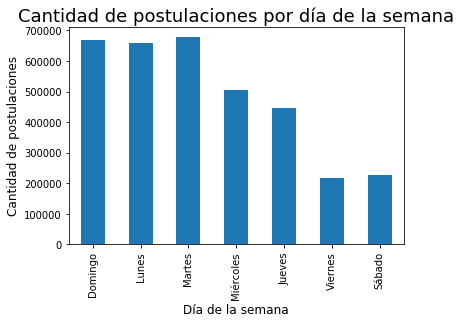

In [19]:
#Se obtiene el día de la semana, se cuenta y se vuelca en un gráfico
days = {0: "Domingo",1: "Lunes",2:"Martes",3: "Miércoles",4: "Jueves",5: "Viernes",6: "Sábado"}

sorter = ["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]
sorterIndex = dict(zip(sorter,range(len(sorter))))

dfpostulaciones["dia_semana"] = dfpostulaciones["fechapostulacion"].dt.dayofweek
dfpostulaciones["dia_semana"] = dfpostulaciones["dia_semana"].apply(lambda x: days[x])
dfpostulacionesAgrupado = dfpostulaciones.groupby("dia_semana").count()
dfpostulacionesAgrupado["id"] = dfpostulacionesAgrupado.index
dfpostulacionesAgrupado["id"] = dfpostulacionesAgrupado["id"].map(sorterIndex)
grafico3 = dfpostulacionesAgrupado.sort_values("id").loc[:, ["idpostulante"]].plot(kind = "bar")
grafico3.legend_.remove()
grafico3.set_title("Cantidad de postulaciones por día de la semana", fontsize=18)
grafico3.set_xlabel("Día de la semana", fontsize=12)
grafico3.set_ylabel("Cantidad de postulaciones", fontsize=12)

La mayor cantidad de postulaciones se realizan los domingos, lunes y martes mientras que a medida que avanza la semana, disminuye rotundamente a un tercio de los valores.

**Vistas y Día de la Semana**

Text(0,0.5,'Cantidad de vistas')

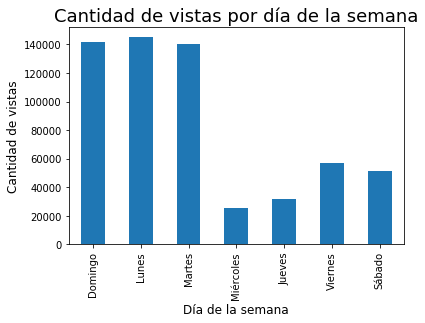

In [20]:
#Se obtiene el día de la semana, se cuenta y se vuelca en un gráfico
dfvistas["dia_semana"] = dfvistas["timestamp"].dt.dayofweek
dfvistas["dia_semana"] = dfvistas["dia_semana"].apply(lambda x: days[x])
dfvistasAgrupado = dfvistas.groupby("dia_semana").count()
dfvistasAgrupado["id"] = dfvistasAgrupado.index
dfvistasAgrupado["id"] = dfvistasAgrupado["id"].map(sorterIndex)
grafico4 = dfvistasAgrupado.sort_values("id").loc[:, ["idpostulante"]].plot(kind = "bar")
grafico4.legend_.remove()
grafico4.set_title("Cantidad de vistas por día de la semana", fontsize = 18)
grafico4.set_xlabel("Día de la semana", fontsize = 12)
grafico4.set_ylabel("Cantidad de vistas", fontsize = 12)

Antes que nada, cabe destacar que esta información se obtiene de una única semana, del 23/2 al 1/3, y de este último día, se tiene información únicamente hasta las 4 de la madrugada. De nuevo se observa una gran cantidad de vistas el domingo, lunes y martes, mientras que el resto de los días registra menores cantidades. 

**Postulaciones y Día del Mes**

Text(0,0.5,'Cantidad de postulaciones')

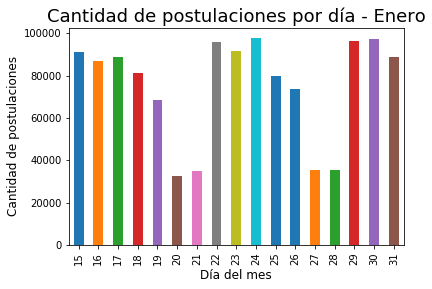

In [21]:
#Filtro por mes de Enero, cuento y grafico
Dias_De_Enero1 = dfpostulaciones.loc[dfpostulaciones["fechapostulacion"].dt.month == 1,]["fechapostulacion"].dt.day.value_counts().sort_index().plot(kind = "bar")
Dias_De_Enero1.set_title("Cantidad de postulaciones por día - Enero", fontsize = 18)
Dias_De_Enero1.set_xlabel("Día del mes", fontsize = 12)
Dias_De_Enero1.set_ylabel("Cantidad de postulaciones", fontsize = 12)

Esta data pertenece al mes de Enero, en el cual sólo se tiene información de la segunda mitad del mes. Los valles que se observan a los días 20, 21, 27 y 28 corresponden a fines de semana donde es más común que se descanse en vez de ocuparse de postularse a empleos. Los jueves y viernes anteriores a estos días, es decir los días 18, 19, 25, y 26 presentan una disminución de la cantidad de postulaciones, en preparación para el fin de semana. Más alla de esto, el resto de los días, que corresponden a lunes, martes y miércoles, muestran la mayor cantidad de postulaciones. Las personas suelen preocuparse sobre su futuro laboral principalmente durante el comienzo de la semana.

Text(0,0.5,'Cantidad de postulaciones')

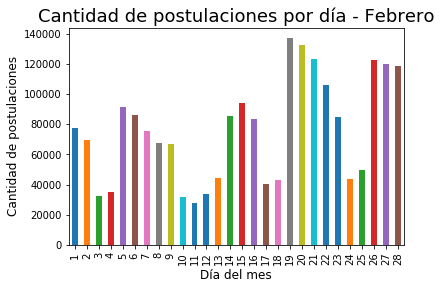

In [22]:
#Filtro por mes de Febrero, cuento y grafico
Dias_De_Febrero1 = dfpostulaciones.loc[dfpostulaciones["fechapostulacion"].dt.month == 2,]["fechapostulacion"].dt.day.value_counts().sort_index().plot(kind = "bar")
Dias_De_Febrero1.set_title("Cantidad de postulaciones por día - Febrero", fontsize = 18)
Dias_De_Febrero1.set_xlabel("Día del mes", fontsize = 12)
Dias_De_Febrero1.set_ylabel("Cantidad de postulaciones", fontsize = 12)

Esta data pertenece al mes de Febrero, donde se tiene información sobre todo el mes. Al igual que en el gráfico anterior, se observan los valles en los fines de semana, con la adición de los días 12 y 13 de febrero que correspondieron a los feriados carnaval. Más allá de eso, presenta los mismos patrones del gráfico anterior: la cantidad de postulaciones es alta al comenzar la semana y disminuye a medida que se acerca el fin de la misma. Además, es interesante notar que la cantidad de postulaciones es mayor a fin de mes que a comienzo, fenómeno que puede ser que ocurra seguido, o puede tener que ver con mucha gente regresando de un viaje en la segunda quincena de Febrero.

**Vistas y Día del Mes**

Text(0,0.5,'Cantidad de vistas')

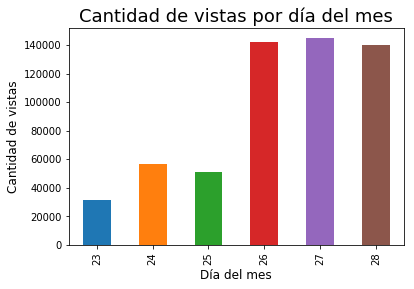

In [23]:
#Cuento y grafico
Dias = dfvistas.loc[dfvistas["timestamp"].dt.month == 2,]["timestamp"].dt.day.value_counts().sort_index().plot(kind = "bar")
Dias.set_title("Cantidad de vistas por día del mes", fontsize = 18)
Dias.set_xlabel("Día del mes", fontsize = 12)
Dias.set_ylabel("Cantidad de vistas", fontsize = 12)

Esta información corresponde a las vistas realizadas desde el viernes 23/2 hasta el miercoles 28/2, es decir, seis días. Una vez más, se observa el mismo patrón: 26, 27 y 28 corresponden a lunes, martes y jueves, donde se registra la mayor cantidad de vistas, mientras que durante el fin de semana, la menor.

Fue necesario realizar ese "dataframe.loc" para filtrar una serie de registros que corresponden al jueves primero de marzo, donde la información alcanzaba únicamente el horario de las cuatro de la madrugada en vez de todo el día, distorcionando la interpretación de la información.